# <u> Code </u>

# The goal of this assignment is two fold: 
# a) Smooth the noisy image attached by using a mean (average ) filter in 3x3 window iteratively until satisfactory results are obtained. Show the results for 1 5 10 iterations.
# b) Do some research on median filters and advantage of median filter over mean filter. Apply median filtering in 3x3 window to smooth the noisy image given below and, iterate 1, 5, 10 times and show the results. Write your conclusions after you compare the results from average filter and median filter

## Part a): Smooth the noisy image attached by using a mean (average) (Convolve)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

256 256


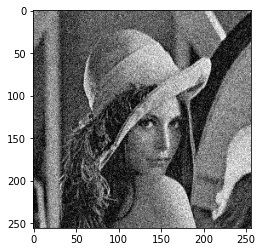

In [2]:
lena_noisy = plt.imread('lena_noisy.jpg')
m,n = lena_noisy.shape
print(m,n)
plt.imshow(lena_noisy, cmap = 'gray')

In [3]:
def padpixels(x):
    m,n = x.shape
    x1 = np.zeros((m,n+2),dtype = 'uint8')
    x1[:,1:n+1] = x
    x1[:,0] = x[:,0]
    x1[:,n+1] = x[:,n-1]
    x2 = np.zeros((m+2,n+2), dtype = 'uint8')
    x2[1:m+1,1:n+1] = x1[0:m,0:n]
    x2[0,:] = x1[0,:]
    x2[m+1,:] = x1[m-1,:]
    return x2

# Padded Image

(258, 258)


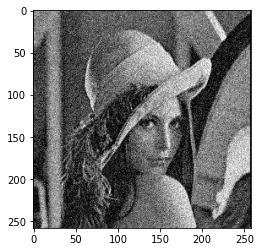

In [4]:
lpad = padpixels(lena_noisy)
print(lpad.shape)
plt.imshow(lpad, cmap = 'gray')

# Implementing the mean spatial filter

In [5]:
def convolve(x,h):
    m,n = x.shape
    x1 = padpixels(x)
    x2 = np.zeros(x1.shape, dtype = 'float')
    for i in range(1,m):
        for j in range (1,n):
            for ii in range(-1,2):
                for jj in range(-1,2):
                    x2[i,j] += x1[i+ii, j+jj]*h[1+ii, 1+jj]
    return x2[1:m+1, 1:n+1]

# Filter h definition

In [6]:
h = np.ones((3,3), dtype = 'float')
h = h/9

# 1 iterations

(256, 256)


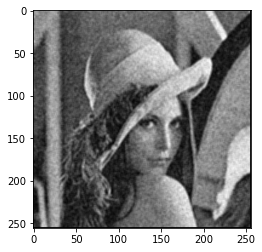

In [7]:
x = lena_noisy
for i in range(1):
    x = np.uint8(convolve(x,h))
plt.imshow(x, cmap = 'gray')
print(x.shape)

# 5 iterations

(256, 256)


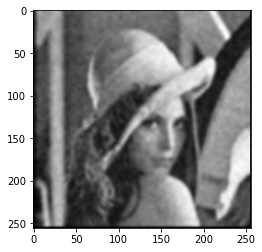

In [8]:
x = lena_noisy
for i in range(5):
    x = np.uint8(convolve(x,h))
plt.imshow(x, cmap = 'gray')
print(x.shape)

# 10 iterations

(256, 256)


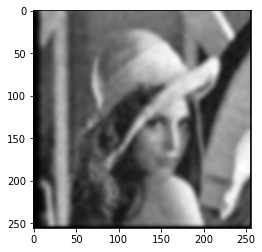

In [9]:
x = lena_noisy
for i in range(10):
    x = np.uint8(convolve(x,h))
plt.imshow(x, cmap = 'gray')
print(x.shape)

##  Part b) Implementing median filtering in 3x3 window to smooth the noisy image given below and, iterate 1, 5, 10 times and show the results. 

In [10]:
def convolveMedian(x):
    m,n = x.shape
    x1 = padpixels(x)
    x2 = np.zeros(x1.shape, dtype = 'float')
    for i in range(1,m):
        for j in range (1,n):
            x2[i,j] = np.median(x1[i:i+3,j:j+3])
    return x2[1:m+1, 1:n+1]
  
            

# 1 iteration

(256, 256)


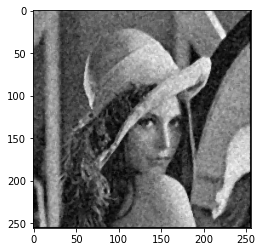

In [11]:
x = lena_noisy
for i in range(1):
    x = np.uint8(convolveMedian(x))
plt.imshow(x, cmap = 'gray')
print(x.shape)

# 5 iterations

(256, 256)


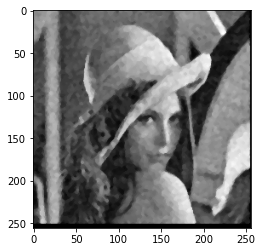

In [12]:
x = lena_noisy
for i in range(5):
    x = np.uint8(convolveMedian(x))
plt.imshow(x, cmap = 'gray')
print(x.shape)

# 10 iterations

(256, 256)


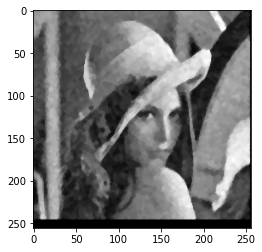

In [13]:
x = lena_noisy
for i in range(10):
    x = np.uint8(convolveMedian(x))
plt.imshow(x, cmap = 'gray')
print(x.shape)